In [6]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import json
from copy import deepcopy
import pandas as pd
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../../')
from style import style_setup

os.system('python ../style/style_setup.py')

0

In [7]:
path_to_folders = '/Users/tolmach/Documents/GitHub/latent_circuit_inference/data/inferred_LCs/CDDMrelu'
path_to_RNNs = '/Users/tolmach/Documents/GitHub/rnn_coach/data/trained_RNNs/CDDMrelu'

In [8]:
subfolders = os.listdir(path_to_folders)
subfolders.remove(".DS_Store")

In [9]:
subfolders.remove("0.0117071_CDDM;relu;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.002;maxiter=3000")

In [10]:
len(subfolders)

110

# first check how well the inferred parameters correlated with one another!

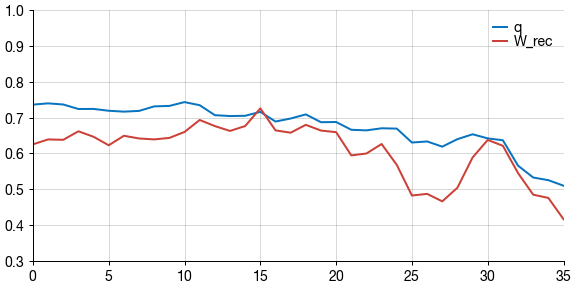

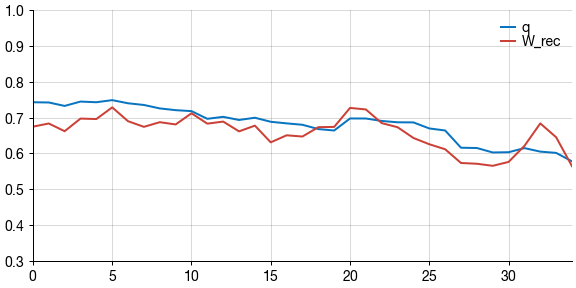

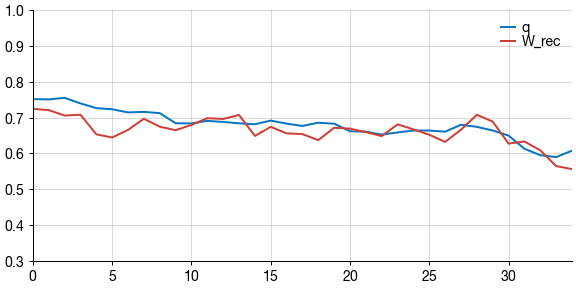

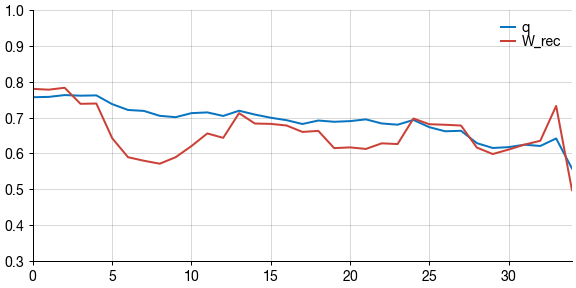

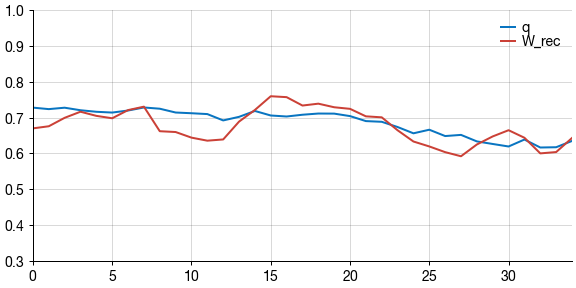

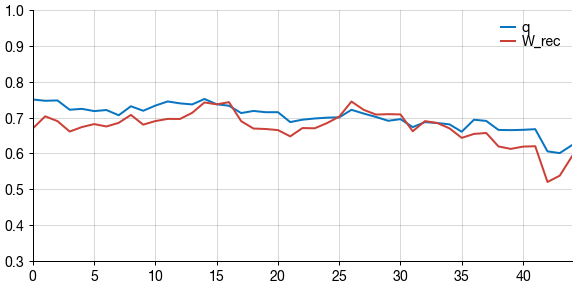

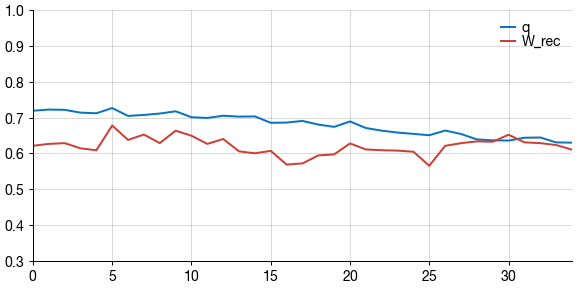

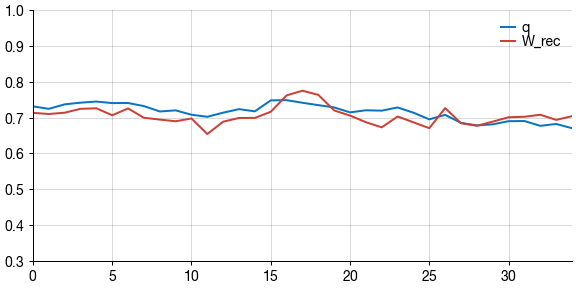

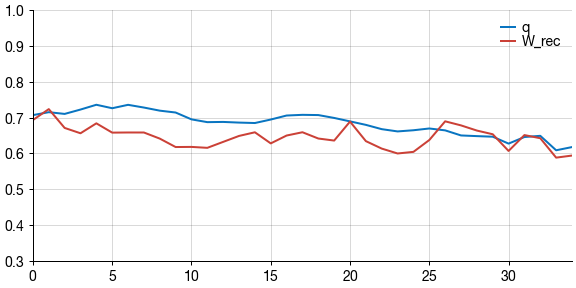

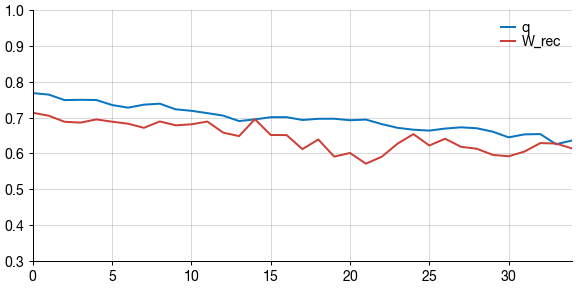

In [23]:
def corr_series(A, width=5):
    res = []
    np.fill_diagonal(A, 0)
    for i in range(A.shape[0]-width):
        res.append(np.mean(A[i:i + width,i:i + width]))
    return np.array(res)

filtered_LC_folders = []
for sf in subfolders:
    path_to_subfolder = os.path.join(path_to_folders, sf)
    if "6_nodes" in os.listdir(path_to_subfolder):
        path_to_subfolder = os.path.join(path_to_subfolder, "6_nodes")
        LC_folders = os.listdir(path_to_subfolder)
        if ".DS_Store" in LC_folders:
            LC_folders.remove(".DS_Store")
        
        scores1 = [float(LC_folder.split("_")[0]) for LC_folder in LC_folders]
        scores2 = [float(LC_folder.split("_")[1]) for LC_folder in LC_folders]
        pdf = pd.DataFrame({"R2 total" : scores1, "R2 projection" : scores2, "LC_folder_name" : LC_folders})
        pdf = pdf.sort_values(by=['R2 total'], ascending=False)
        folders_sorted = list(pdf["LC_folder_name"])
        scores1_sorted = list(pdf["R2 total"])
        scores2_sorted = list(pdf["R2 projection"])
        W_inps_sorted = []
        W_recs_sorted = []
        W_outs_sorted = []
        qs_sorted = []
        for i, folder in enumerate(folders_sorted):
            data_file = os.path.join(path_to_subfolder, folder, f"{scores1_sorted[i]}_{scores2_sorted[i]}_LC_params.json")
            data = json.load(open(data_file, "rb+"))
            W_inps_sorted.append(np.array(data["W_inp"]).flatten().reshape(1, -1))
            W_recs_sorted.append(np.array(data["W_rec"]).flatten().reshape(1, -1))
            W_outs_sorted.append(np.array(data["W_out"]).flatten().reshape(1, -1))
            qs_sorted.append(np.array(data["q"]).flatten().reshape(1, -1))
    #         print(qs_sorted[-1].shape)
            W_inps_sorted[-1] /= np.linalg.norm(W_inps_sorted[-1])
            W_recs_sorted[-1] /= np.linalg.norm(W_recs_sorted[-1])
            W_outs_sorted[-1] /= np.linalg.norm(W_outs_sorted[-1])
            qs_sorted[-1] /= np.linalg.norm(qs_sorted[-1])
        W_inps_flat = np.vstack(W_inps_sorted)
        W_outs_flat = np.vstack(W_outs_sorted)
        W_recs_flat = np.vstack(W_recs_sorted)
        qs_flat = np.vstack(qs_sorted)

        #now plot a bunch of correlations!
        fig, axs = plt.subplots(1, 1, figsize = (4, 2))
        axs.plot(corr_series(qs_flat @ qs_flat.T), label = "q")
        res = corr_series(W_recs_flat @ W_recs_flat.T)
        if res[0]>0.65:
            filtered_LC_folders.append(sf)
        axs.plot(res, label = "W_rec")
        axs.set_ylim([0.3, 1])
        plt.grid(True)
        plt.legend()
        plt.show()

In [24]:
filtered_LC_folders

['0.0075694_CDDM;relu;N=92;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000',
 '0.0075731_CDDM;relu;N=92;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000',
 '0.0076246_CDDM;relu;N=93;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000',
 '0.0076113_CDDM;relu;N=93;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000',
 '0.0073783_CDDM;relu;N=98;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000',
 '0.0077065_CDDM;relu;N=89;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000',
 '0.007659_CDDM;relu;N=96;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000',
 '0.007675_CDDM;relu;N=96;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000']

0.0075694_CDDM;relu;N=92;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000
0.8492144408447738 0.9051847768867461


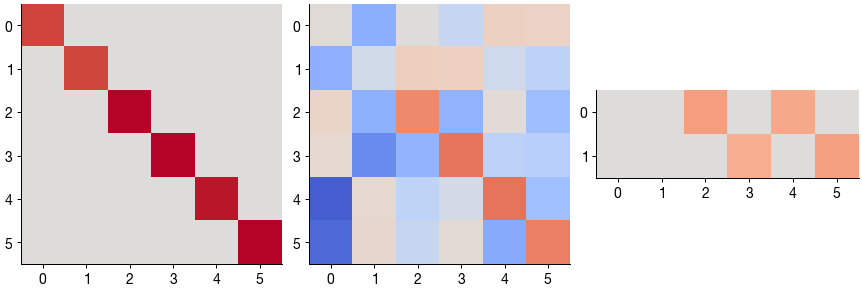

0.0075731_CDDM;relu;N=92;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000
0.8600383556896123 0.9008133817806363


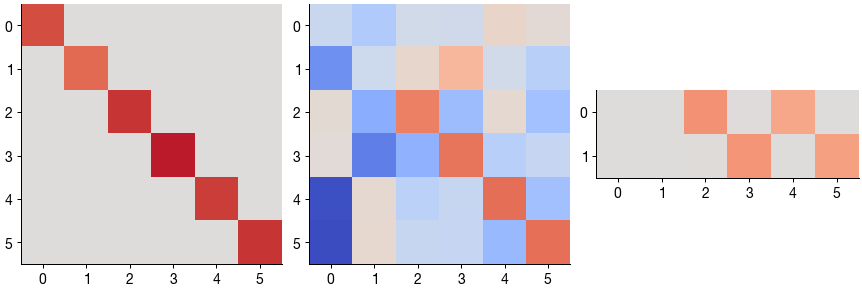

0.0076246_CDDM;relu;N=93;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000
0.8532759062091729 0.9151043031869804


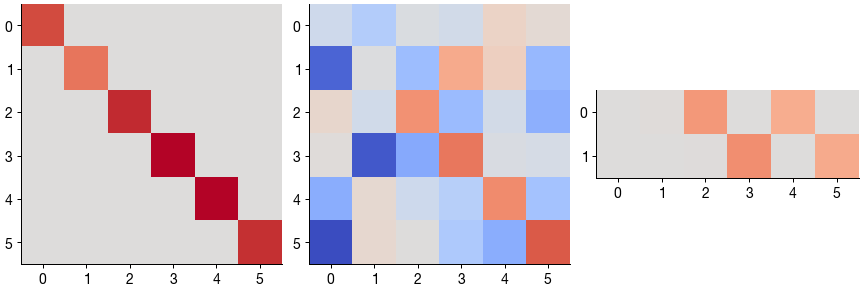

0.0076113_CDDM;relu;N=93;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000
0.854890241653442 0.9142272059522758


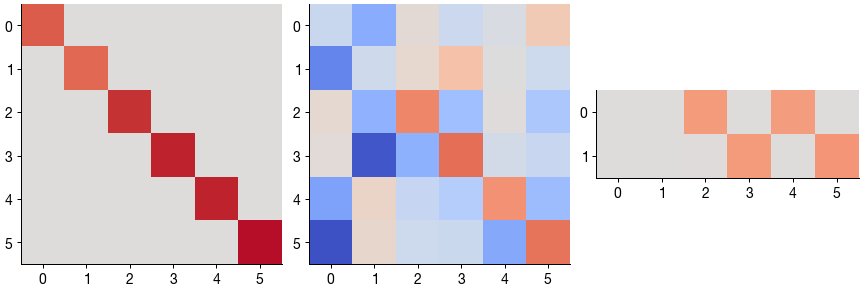

0.0073783_CDDM;relu;N=98;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000
0.8621874503566045 0.9084564489226945


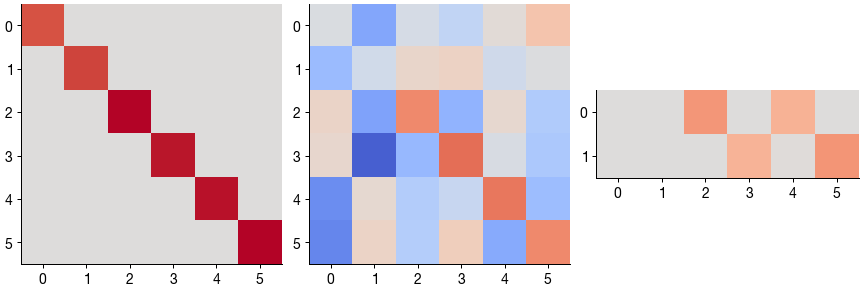

0.0077065_CDDM;relu;N=89;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000
0.8641813343023691 0.9088647572091402


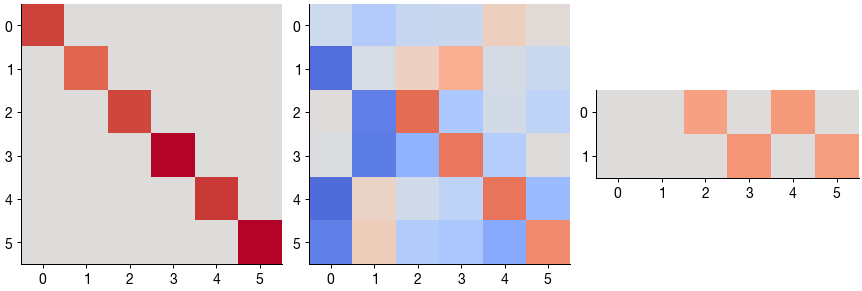

0.007659_CDDM;relu;N=96;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000
0.8613120530130842 0.9100367011382675


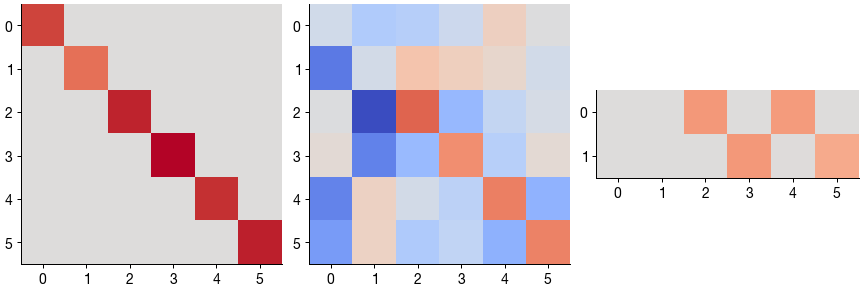

0.007675_CDDM;relu;N=96;lmbdo=0.3;orth_inp_only=True;lmbdr=0.5;lr=0.005;maxiter=1000
0.8626308143151625 0.9154607435224341


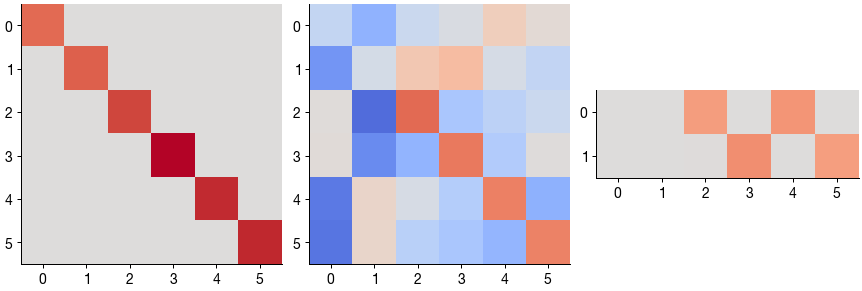

In [27]:
qs = []
Us = []
for sf in filtered_LC_folders:
    path_to_subfolder = os.path.join(path_to_folders, sf, "6_nodes")
    LC_folders = os.listdir(path_to_subfolder)
#     print(path_to_subfolder)
    if ".DS_Store" in LC_folders:
        LC_folders.remove(".DS_Store")
    scores1 = [float(LC_folder.split("_")[0]) for LC_folder in LC_folders]
    scores2 = [float(LC_folder.split("_")[1]) for LC_folder in LC_folders]
    pdf = pd.DataFrame({"R2 total" : scores1, "R2 projection" : scores2, "LC_folder_name" : LC_folders})
    pdf = pdf.sort_values(by=['R2 total'], ascending=False)
    folders_sorted = list(pdf["LC_folder_name"])
    scores1_sorted = list(pdf["R2 total"])
    scores2_sorted = list(pdf["R2 projection"])
    
    # get the average result across 5 top LCs!
    W_inp = np.zeros((6,6))
    W_rec = np.zeros((6,6))
    W_out = np.zeros((2,6))
    num_nets = 7
    for i in range(num_nets):
        data_file = os.path.join(path_to_subfolder, folders_sorted[i], f"{scores1_sorted[i]}_{scores2_sorted[i]}_LC_params.json")
        data = json.load(open(data_file, "rb+"))
        W_inp += np.array(data["W_inp"])
        W_rec += np.array(data["W_rec"])
        W_out += np.array(data["W_out"])
    W_inp/=num_nets
    W_rec/=num_nets
    W_out/=num_nets
    print(sf)
    print(scores1_sorted[0], scores2_sorted[0])
    
    fig, axs = plt.subplots(1, 3, figsize = (6,2))
    axs[0].imshow(W_inp, cmap = 'coolwarm', vmin=-1, vmax = 1)
    axs[1].imshow(W_rec, cmap = 'coolwarm', vmin=-1, vmax = 1)
    axs[2].imshow(W_out, cmap = 'coolwarm', vmin=-1, vmax = 1)
    plt.show()

In [28]:
nets_to_study = filtered_LC_folders

In [29]:
w_recs = []
w_outs = []
w_inps = []
W_recs = []
W_outs = []
W_inps = []
Qs = []
for sf in nets_to_study:
    path_to_subfolder = os.path.join(path_to_folders, sf)
    LC_folders = os.listdir(path_to_subfolder)
#     print(path_to_subfolder)
    if ".DS_Store" in LC_folders:
        LC_folders.remove(".DS_Store")
    scores1 = [float(LC_folder.split("_")[0]) for LC_folder in LC_folders]
    scores2 = [float(LC_folder.split("_")[1]) for LC_folder in LC_folders]
    pdf = pd.DataFrame({"R2 total" : scores1, "R2 projection" : scores2, "LC_folder_name" : LC_folders})
    pdf = pdf.sort_values(by=['R2 total'], ascending=False)
    folders_sorted = list(pdf["LC_folder_name"])
    scores1_sorted = list(pdf["R2 total"])
    scores2_sorted = list(pdf["R2 projection"])

    data_file = os.path.join(path_to_subfolder, folders_sorted[0], f"{scores1_sorted[0]}_{scores2_sorted[0]}_LC_params.json")
    data = json.load(open(data_file, "rb+"))
    w_inp = np.array(data["W_inp"])
    w_rec = np.array(data["W_rec"])
    w_out = np.array(data["W_out"])
    U = np.array(data["U"])
    q = np.array(data["q"])
    Q = U.T @ q
    w_inps.append(deepcopy(W_inp))
    w_recs.append(deepcopy(W_rec))
    w_outs.append(deepcopy(W_out))
    Qs.append(deepcopy(Q))
    rnn_score = float(sf.split("_")[0])
    
    rnn_config_file = os.path.join(path_to_subfolder, folders_sorted[0], f"{rnn_score}_params_CDDM.json")
    
    data_RNN = json.load(open(rnn_config_file, "rb+"))
    W_inp = np.array(data_RNN["W_inp"])
    W_rec = np.array(data_RNN["W_rec"])
    W_out = np.array(data_RNN["W_out"])
    W_inps.append(deepcopy(W_inp))
    W_recs.append(deepcopy(W_rec))
    W_outs.append(deepcopy(W_out))

ValueError: could not convert string to float: 'nodes'

IndexError: list index out of range

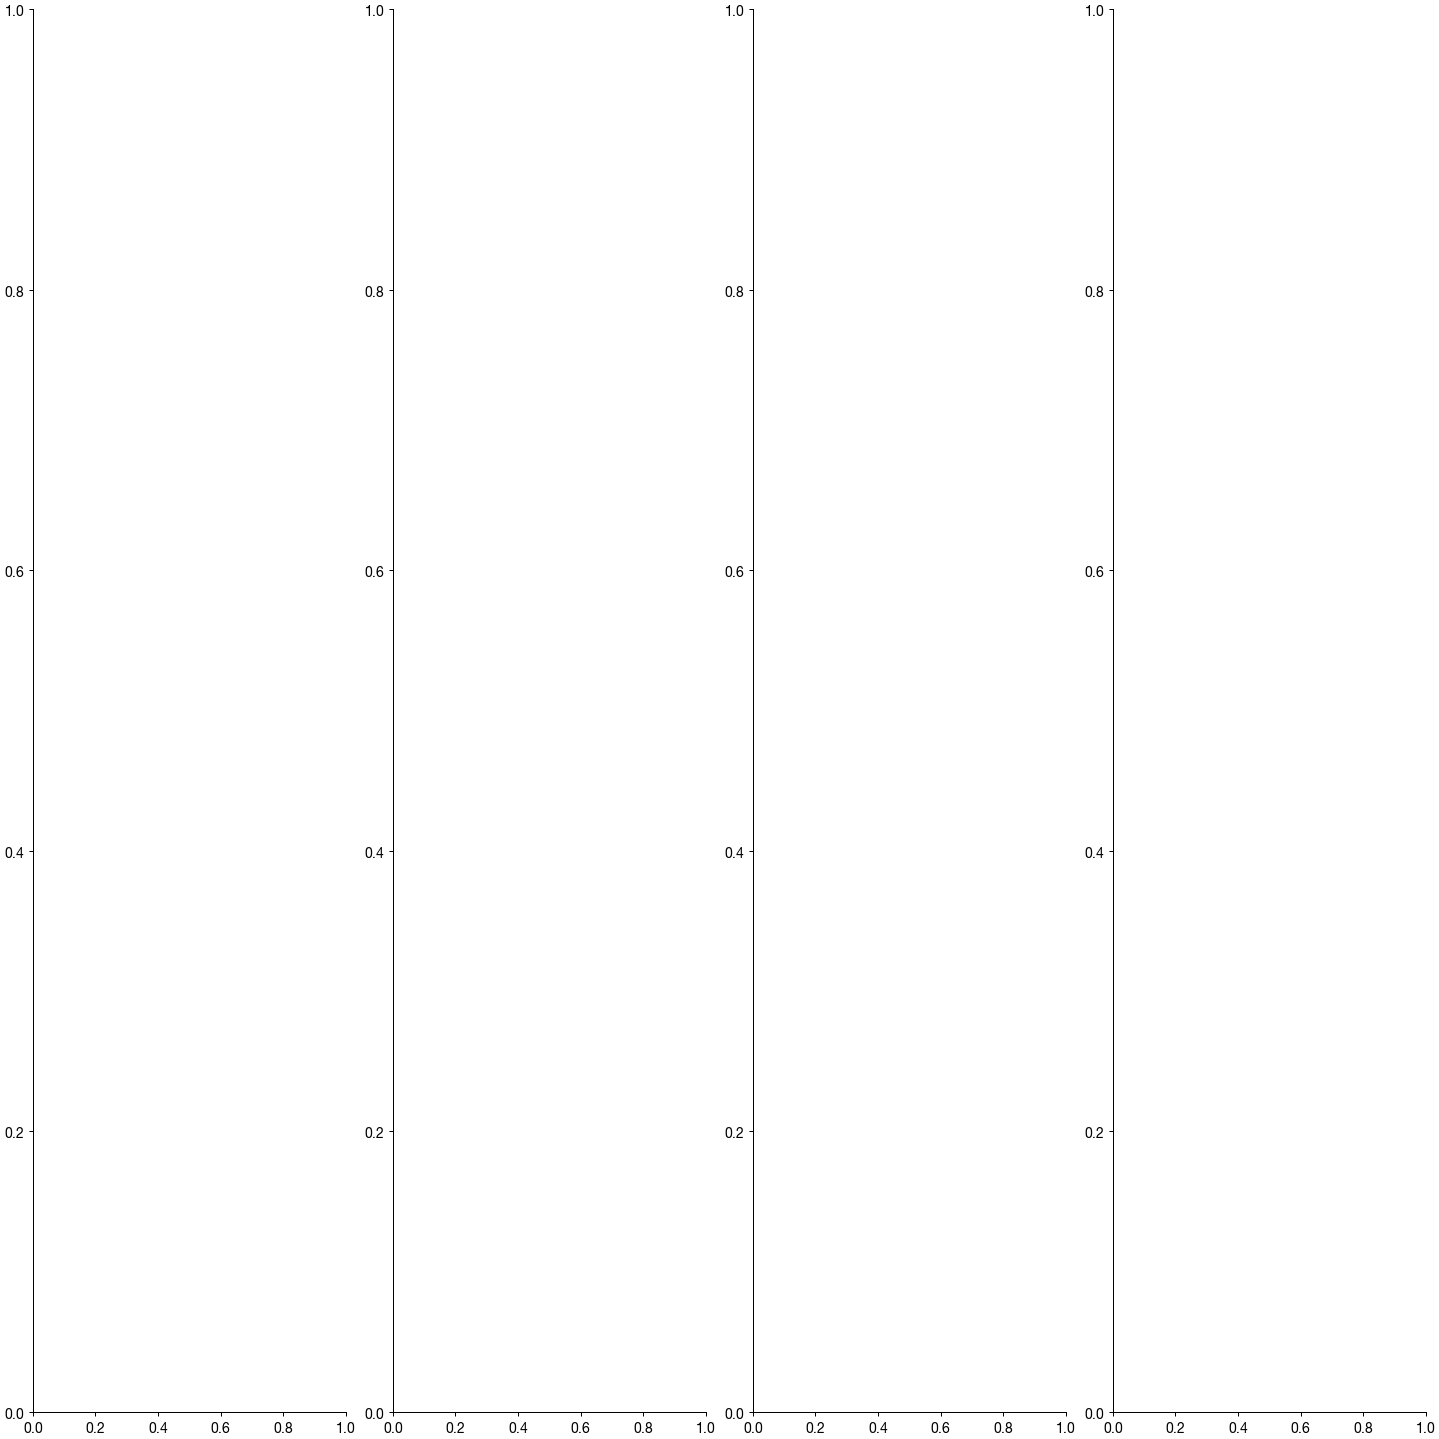

In [30]:
j = 0
fig, axs = plt.subplots(1, 4, figsize = (10,10))
axs[0].imshow(W_inps[j], cmap = 'coolwarm', vmin=-1, vmax = 1)
axs[1].imshow(W_outs[j].T, cmap = 'coolwarm', vmin=-1, vmax = 1)
axs[2].imshow(Qs[j], cmap = 'coolwarm', vmin=-1, vmax = 1)
axs[3].imshow(W_recs[j], cmap = 'coolwarm', vmin=-0.5, vmax = 0.5)
axs[3].set_aspect(4.1, adjustable='box')
plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(W_inps[j])

PCA(n_components=3)

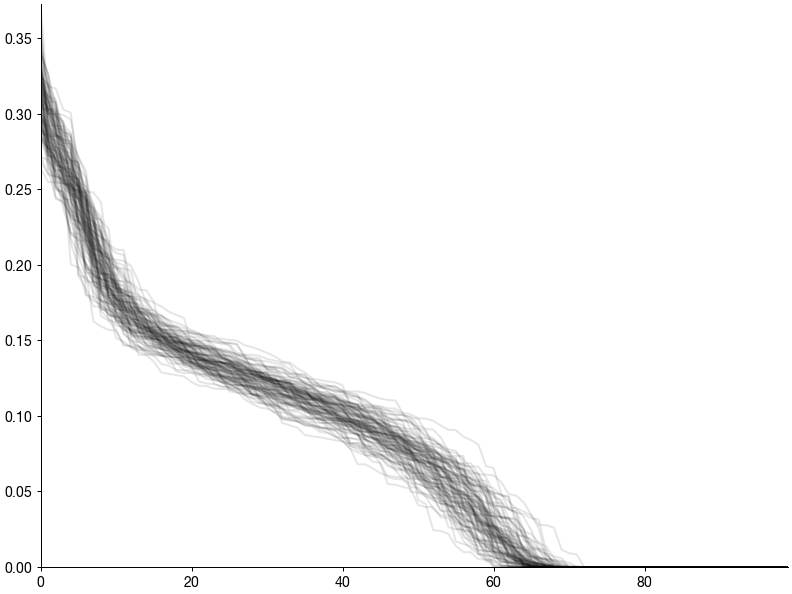

In [17]:
for i in range(len(W_outs)):
    plt.plot(np.sort(np.sum(W_outs[i], axis = 0))[::-1], alpha = 0.1, color = 'k')

# the inputs are not uniform!

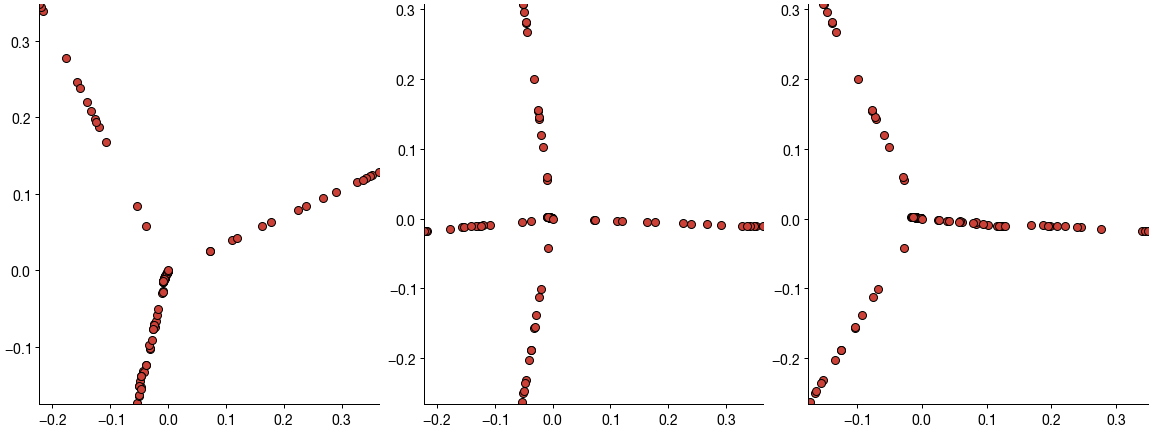

In [18]:
mat = W_inps[j]@ pca.components_.T
fig, axs = plt.subplots(1, 3, figsize = (8,3))
axs[0].scatter(mat[:, 0], mat[:, 1], color = 'r', edgecolor = 'k')
axs[1].scatter(mat[:, 0], mat[:, 2], color = 'r', edgecolor = 'k')
axs[2].scatter(mat[:, 1], mat[:, 2], color = 'r', edgecolor = 'k')
plt.show()

# need to check the clustering of the original traces of the RNN

TODO (need to save trajectories as a separate file! I don't want to rerun it constantly)